# Import library

Import the code libraries associated with project objectives

In [ ]:
from scipy import stats # to calculate interqualtile range
from matplotlib.pyplot import figure
import pandas as pd # to create table format data
from google.colab import files # to upload data file
import io # process inpit and output
import statistics # to calculate variance
import seaborn as sns
import tweepy as tw
import re #regular expression
from textblob import TextBlob
import string

!pip install tweet-preprocessor
import preprocessor as p

# Provide the token

Create your token : https://developer.twitter.com/en/portal/projects-and-apps

1. Create an app inside the link
2. Then they will provide the key  and tokens


In [ ]:
# consumer key & secret (Who you are)
api_key= 'ibOqgpfgqmwqxTo7I7GwSbyyK'
api_secret= 'fEKAXvXTWRf8yEFWV32jAnHaoxDUg52WiIJ88JutiDiXrxiu7v'

# Authentication token & secret (mainly which app it is )
access_token= '120054103-C1u3Nt5ELWBNcxl77SIIYudYDEAIvMnPMFVHmax4'
access_token_secret= 'DQMyGkJvb3MmmmFi9B3HnBTTthJKd5wp5b9DpQBFwVrl4'

# Check authentication to twitter

In [ ]:
auth = tw.OAuthHandler(api_key, api_secret) # check the consumer authentication is successful or not
auth.set_access_token(access_token, access_token_secret) # check the app authentication is successfull or not
api = tw.API(auth, wait_on_rate_limit=True) # activate the api for requesting the data

# Set a search query

my hash tag is schoolsafety, schoolsafety2023, texasschoolsafety

In [ ]:
search_word = "#aiineducation"
# you can change the hashtag according to your choice
# problematic, equity, funding
search_word2 = "#chatgpt"

# Request twitter data with mentioned query

In [ ]:
tweets = tw.Cursor(api.search_tweets,  q=search_word, lang="en").items(500)
    # the query executes with 100 items.
    # You can change the number according your choice
tweets2 = tw.Cursor(api.search_tweets, q=search_word2, lang='en').items(500)

# Create a table with the tweets

Possible variables are returned with tweets
1. tweet.id - Unique ID of the tweet
2. tweet.text - Text of the tweet
3. tweer.created_at - The date and time when the tweet is created
4. tweet.user.screen_name - Print the screen name of the user who tweets
5. tweet.user.id - Print the USER ID of the user who tweets
6. tweet.lang - print out the language of the tweets
7. tweet.retweet_count : The number of retweets of the status.
8. tweet.favorite_count : The number of likes of the status.

Few list is available here - https://www.geeksforgeeks.org/python-status-object-in-tweepy/

Full list is available here
https://developer.twitter.com/en/docs/twitter-api/data-dictionary/object-model/tweet

In [ ]:
data = [[tweet.user.screen_name, tweet.text, tweet.favorite_count, tweet.retweet_count ] for tweet in tweets]

dataframe = pd.DataFrame(data=data,  columns=['User', "Tweet", "Like Count", "Retweet count"])
dataframe

,User,Tweet,Like Count,Retweet count
0,HiLink_Inc,✨ Hear It Directly From Our Users!\n\nDive int...,0,0
1,lacoe_ito,"If you missed last week's #LACOEAI Symposium,...",0,0
2,bachir_saghir,RT @HarvardBizEdu: .@MitchWei of @HarvardHBS c...,0,4
3,WeeTiongLee,RT @HarvardBizEdu: .@MitchWei of @HarvardHBS c...,0,4
4,HarvardHBS,RT @HarvardBizEdu: .@MitchWei of @HarvardHBS c...,0,4
...,...,...,...,...
383,Nyktos_eth,RT @tryjohnny: 🙌 I'm super excited to see the ...,0,4
384,VassiliadouM,RT @GlobalEdAction: Unlock the potential of #A...,0,2
385,RL222,🌟🎓 Empower the education revolution with AI ex...,0,0
386,ZeinaChalich,The new Australian Framework for #AI in School...,8,3


In [ ]:
data2 = [[tweet.user.screen_name, tweet.text, tweet.favorite_count, tweet.retweet_count ] for tweet in tweets2]

dataframe2 = pd.DataFrame(data=data2,  columns=['User', "Tweet", "Like Count", "Retweet count"])
dataframe2

,User,Tweet,Like Count,Retweet count
0,DNSFilter,"Now with the prevalence of #ChatGPT, some orga...",0,0
1,JasonATBASRPod,RT @TheHookRocks: 🪝Check out The Hook Rocks co...,0,1
2,elevateyourride,RT @BeachStockTrade: $BLNK Blink Charging #Ear...,0,4
3,SNova618,RT @Piz_Wiz: Guide to using Chat GPT to assist...,0,2
4,CollinsLis74940,8196293️😑matter special above garden \n #同志直播软...,14,14
5,Khulood_Almani,RT @Khulood_Almani: 🎯💡Check the Evolution of #...,0,40
6,Horlar2273,"RT @aisponsor: 1,000,000 in $AIS to the first ...",0,1243


In [ ]:
dataframe = pd.concat([dataframe,dataframe2],ignore_index = True)
dataframe

,User,Tweet,Like Count,Retweet count
0,HiLink_Inc,✨ Hear It Directly From Our Users!\n\nDive int...,0,0
1,lacoe_ito,"If you missed last week's #LACOEAI Symposium,...",0,0
2,bachir_saghir,RT @HarvardBizEdu: .@MitchWei of @HarvardHBS c...,0,4
3,WeeTiongLee,RT @HarvardBizEdu: .@MitchWei of @HarvardHBS c...,0,4
4,HarvardHBS,RT @HarvardBizEdu: .@MitchWei of @HarvardHBS c...,0,4
...,...,...,...,...
390,elevateyourride,RT @BeachStockTrade: $BLNK Blink Charging #Ear...,0,4
391,SNova618,RT @Piz_Wiz: Guide to using Chat GPT to assist...,0,2
392,CollinsLis74940,8196293️😑matter special above garden \n #同志直播软...,14,14
393,Khulood_Almani,RT @Khulood_Almani: 🎯💡Check the Evolution of #...,0,40


# Eliminating rows with duplicate tweets

In [ ]:
dataframe.drop_duplicates(subset="Tweet",keep=False,inplace=True,ignore_index=True)
dataframe

,User,Tweet,Like Count,Retweet count
0,HiLink_Inc,✨ Hear It Directly From Our Users!\n\nDive int...,0,0
1,lacoe_ito,"If you missed last week's #LACOEAI Symposium,...",0,0
2,IC_Sydney,Join us to celebrate #NationalScienceWeek with...,0,0
3,leadlearnlab,💥 AI in Education: Friend or Foe?\n💡 Decoding ...,0,0
4,bruff73,"🎓 Teachers, discover the potential of ChatGPT ...",0,0
...,...,...,...,...
251,elevateyourride,RT @BeachStockTrade: $BLNK Blink Charging #Ear...,0,4
252,SNova618,RT @Piz_Wiz: Guide to using Chat GPT to assist...,0,2
253,CollinsLis74940,8196293️😑matter special above garden \n #同志直播软...,14,14
254,Khulood_Almani,RT @Khulood_Almani: 🎯💡Check the Evolution of #...,0,40


# Pre-processing the text to remove RT, mentions, non-alphabetical characters and extra spaces from the tweets

In [ ]:
def clean_tweet(tweet):
  tweet = tweet.replace("#","")
  tweet = tweet.replace("!","")
  tweet = tweet.replace(",","")
  tweet = tweet.replace("?","")
  tweet = p.clean(tweet)
  tweet = tweet.replace("&amp;","")
  tweet_list = tweet.split(" ")
  tweet = " ".join([t for t in tweet.split(" ") if t.isalpha()])
  return tweet

dataframe['Tweet_processed'] = dataframe['Tweet'].apply(lambda value: clean_tweet(value))
dataframe

,User,Tweet,Like Count,Retweet count,Tweet_processed
0,HiLink_Inc,✨ Hear It Directly From Our Users!\n\nDive int...,0,0,Hear It Directly From Our UsersDive into real ...
1,lacoe_ito,"If you missed last week's #LACOEAI Symposium,...",0,0,If you missed last LACOEAI Symposium here are ...
2,IC_Sydney,Join us to celebrate #NationalScienceWeek with...,0,0,Join us to celebrate NationalScienceWeek with ...
3,leadlearnlab,💥 AI in Education: Friend or Foe?\n💡 Decoding ...,0,0,AI in Friend or Foe Decoding the Power of Resp...
4,bruff73,"🎓 Teachers, discover the potential of ChatGPT ...",0,0,Teachers discover the potential of ChatGPT as ...
...,...,...,...,...,...
251,elevateyourride,RT @BeachStockTrade: $BLNK Blink Charging #Ear...,0,4,Blink Charging Earnings HC Wainwright Co reite...
252,SNova618,RT @Piz_Wiz: Guide to using Chat GPT to assist...,0,2,Guide to using Chat GPT to assist with game Ch...
253,CollinsLis74940,8196293️😑matter special above garden \n #同志直播软...,14,14,matter special above garden ChatGPT mm
254,Khulood_Almani,RT @Khulood_Almani: 🎯💡Check the Evolution of #...,0,40,Check the Evolution of GenerativeAI MachineLea...


In [ ]:
for tweet in dataframe['Tweet']:
  print("Before:",tweet)

  tweet = tweet.replace("#","")
  tweet = tweet.replace("RT","")
  tweet = tweet.replace(":","")
  tweet = tweet.replace('"',"")

  while tweet.find("https://t.co/") != -1:
    tweet = tweet[0:tweet.find("https://t.co/")] + tweet[tweet.find("https://t.co/")+10:]
  print("After:",tweet)

Before: ✨ Hear It Directly From Our Users!

Dive into real stories of how HiLink is transforming classrooms and enhancing t… https://t.co/qfakSwSNCS
After: ✨ Hear It Directly From Our Users!

Dive into real stories of how HiLink is transforming classrooms and enhancing t… https//t.co/qfakSwSNCS
Before: If you missed last week's #LACOEAI  Symposium, here are the slides from Dr. Jeff Share's "Critical Media Literacy F… https://t.co/r2eln8tKjm
After: If you missed last week's LACOEAI  Symposium, here are the slides from Dr. Jeff Share's Critical Media Literacy F… https//t.co/r2eln8tKjm
Before: Join us to celebrate #NationalScienceWeek with @srap_ieap  and dive into the world of AI and its impact on educatio… https://t.co/l8at4liTmN
After: Join us to celebrate NationalScienceWeek with @srap_ieap  and dive into the world of AI and its impact on educatio… https//t.co/l8at4liTmN
Before: 💥 AI in Education: Friend or Foe?
💡 Decoding the Power of Responsible Use 
🔗 https://t.co/JnjqqMQOCs… https

# Inspecting users to sense credibility

In [ ]:
unique_users = dataframe['User'].unique()

def find_education_users(user):
  user = user.lower()
  if 'edu' in user or "teach" in user or "school" in user or "learn" in user:
    print(user)
    return 1
  return 0

count = 0
for user in unique_users:
  count += find_education_users(user)
print()
print("There are",len(unique_users),'users')
print(count,'total users are associated with education')
print(str(round(count/len(unique_users)*100,2))+"% of users are associated with education")

leadlearnlab
harvardbizedu
teachermaticai
eduaideai
edulinkai
teachkiwi
dailyaiedu
aiteachernet
ed3educators
terrykteacher
ai4educators
schoolcouldbe
shakeuplearning
gamalearn
theaieducatorx
ranga_edu
aiteachingguru
harrymyschoolai
edugist
learnwiseai
theeducatorau
educationnews_b
hollyclarkedu
tbelmontedu
angelesvteacher
schoolxai

There are 176 users
26 total users are associated with education
14.77% of users are associated with education


In [ ]:
def eliminate_non_edu_users(user):
  user = user.lower()
  if 'edu' in user or "teach" in user or "school" in user or "learn" in user:
    return True
  else:
    return False
dataframe['Education Affiliation'] = dataframe['User'].apply(lambda value: eliminate_non_edu_users(value))

# Counting the appearances of keywords among all the tweets

In [ ]:
my_list = []

for tweet in dataframe['Tweet']:
  tweet_list = tweet.lower().split()
  for twt in tweet_list:
    if "@" not in twt and twt != 'rt' and "https" not in twt:
      my_list.append(twt)
freq = {}
for items in my_list:
  freq[items] = my_list.count(items)
for key, value in freq.items():
  print("% s : % s" % (key, value))

✨ : 2
hear : 3
it : 11
directly : 1
from : 25
our : 48
users! : 1
dive : 10
into : 22
real : 1
stories : 1
of : 101
how : 52
hilink : 1
is : 38
transforming : 8
classrooms : 7
and : 72
enhancing : 1
t… : 5
if : 2
you : 19
missed : 1
last : 3
week's : 2
#lacoeai : 2
symposium, : 1
here : 4
are : 37
the : 153
slides : 1
dr. : 4
jeff : 1
share's : 1
"critical : 1
media : 2
literacy : 4
f… : 2
join : 20
us : 7
to : 127
celebrate : 1
#nationalscienceweek : 1
with : 65
world : 6
ai : 115
its : 5
impact : 6
on : 38
educatio… : 1
💥 : 4
in : 92
education: : 9
friend : 4
or : 7
foe? : 4
💡 : 4
decoding : 3
power : 13
responsible : 3
use : 19
🔗 : 3
🎓 : 6
teachers, : 3
discover : 23
potential : 7
chatgpt : 15
as : 9
your : 35
virtual : 1
teaching : 15
assistant! : 3
streamline : 1
admin : 2
tasks, : 2
boost : 4
pro… : 1
considers : 1
his : 2
partner. : 1
latest : 7
inspiring : 1
minds : 2
article, : 1
he : 2
shares… : 1
behind : 3
#ai : 31
there : 1
a : 54
lot : 1
work : 3
done : 2
much : 2
more : 

In [ ]:
from collections import Counter

Counter(" ".join(dataframe["Tweet"]).split()).most_common(30)

[('the', 133),
 ('to', 124),
 ('AI', 114),
 ('of', 100),
 ('in', 88),
 ('and', 71),
 ('with', 65),
 ('for', 52),
 ('a', 47),
 ('how', 42),
 ('RT', 42),
 ('our', 40),
 ('on', 38),
 ('is', 37),
 ('are', 33),
 ('your', 32),
 ('&amp;', 30),
 ('#AI', 29),
 ('education', 27),
 ('learning', 27),
 ('we', 25),
 ('an', 23),
 ('into', 22),
 ('this', 22),
 ('at', 22),
 ('can', 21),
 ('The', 20),
 ('from', 19),
 ('#AIinEducation', 19),
 ('you', 18)]

# Inspecting the retweet count and normalizing the retweet count column

In [ ]:
minimum = dataframe['Retweet count'].min()
maximum = dataframe['Retweet count'].max()
average = dataframe['Retweet count'].mean()

print ("Minimum Retweet is ", minimum)
print ("Maximum Retweet is ", maximum)
print ("Average Retweet is ", average)

Minimum Retweet is  0
Maximum Retweet is  1243
Average Retweet is  6.27734375


In [ ]:
dataframe['Retweet count'] = dataframe['Retweet count'].astype('float64') # only float column can have max and min

max_value = dataframe["Retweet count"].max() # find max
print ("Max Value", max_value)

min_value = dataframe["Retweet count"].min() # find min
print ("Min Value", min_value)

range = max_value - min_value # find difference/range of max and min
print ("Range", range)

dataframe["Normalized"] = (dataframe["Retweet count"] - min_value ) / range

dataframe

Max Value 1243.0
Min Value 0.0
Range 1243.0


,User,Tweet,Like Count,Retweet count,Tweet_processed,Education Affiliation,Normalized
0,HiLink_Inc,✨ Hear It Directly From Our Users!\n\nDive int...,0,0.0,Hear It Directly From Our UsersDive into real ...,False,0.000000
1,lacoe_ito,"If you missed last week's #LACOEAI Symposium,...",0,0.0,If you missed last LACOEAI Symposium here are ...,False,0.000000
2,IC_Sydney,Join us to celebrate #NationalScienceWeek with...,0,0.0,Join us to celebrate NationalScienceWeek with ...,False,0.000000
3,leadlearnlab,💥 AI in Education: Friend or Foe?\n💡 Decoding ...,0,0.0,AI in Friend or Foe Decoding the Power of Resp...,True,0.000000
4,bruff73,"🎓 Teachers, discover the potential of ChatGPT ...",0,0.0,Teachers discover the potential of ChatGPT as ...,False,0.000000
...,...,...,...,...,...,...,...
251,elevateyourride,RT @BeachStockTrade: $BLNK Blink Charging #Ear...,0,4.0,Blink Charging Earnings HC Wainwright Co reite...,False,0.003218
252,SNova618,RT @Piz_Wiz: Guide to using Chat GPT to assist...,0,2.0,Guide to using Chat GPT to assist with game Ch...,False,0.001609
253,CollinsLis74940,8196293️😑matter special above garden \n #同志直播软...,14,14.0,matter special above garden ChatGPT mm,False,0.011263
254,Khulood_Almani,RT @Khulood_Almani: 🎯💡Check the Evolution of #...,0,40.0,Check the Evolution of GenerativeAI MachineLea...,False,0.032180


# Inspecting the like count column

In [ ]:
minimum = dataframe['Like Count'].min()
maximum = dataframe['Like Count'].max()
average = dataframe['Like Count'].mean()

print ("Minimum Like is ", minimum)
print ("Maximum Like is ", maximum)
print ("Average Like is ", average)

Minimum Like is  0
Maximum Like is  88
Average Like is  2.75390625


# Removing tweets with a massive amount of retweets as it skews the data

In [ ]:
retweet_outliers = dataframe['Retweet count'] > 250
dataframe = dataframe[~retweet_outliers] # removes rows
dataframe

,User,Tweet,Like Count,Retweet count,Tweet_processed,Education Affiliation,Normalized
0,HiLink_Inc,✨ Hear It Directly From Our Users!\n\nDive int...,0,0.0,Hear It Directly From Our UsersDive into real ...,False,0.000000
1,lacoe_ito,"If you missed last week's #LACOEAI Symposium,...",0,0.0,If you missed last LACOEAI Symposium here are ...,False,0.000000
2,IC_Sydney,Join us to celebrate #NationalScienceWeek with...,0,0.0,Join us to celebrate NationalScienceWeek with ...,False,0.000000
3,leadlearnlab,💥 AI in Education: Friend or Foe?\n💡 Decoding ...,0,0.0,AI in Friend or Foe Decoding the Power of Resp...,True,0.000000
4,bruff73,"🎓 Teachers, discover the potential of ChatGPT ...",0,0.0,Teachers discover the potential of ChatGPT as ...,False,0.000000
...,...,...,...,...,...,...,...
250,JasonATBASRPod,RT @TheHookRocks: 🪝Check out The Hook Rocks co...,0,1.0,Check out The Hook Rocks conversation with mus...,False,0.000805
251,elevateyourride,RT @BeachStockTrade: $BLNK Blink Charging #Ear...,0,4.0,Blink Charging Earnings HC Wainwright Co reite...,False,0.003218
252,SNova618,RT @Piz_Wiz: Guide to using Chat GPT to assist...,0,2.0,Guide to using Chat GPT to assist with game Ch...,False,0.001609
253,CollinsLis74940,8196293️😑matter special above garden \n #同志直播软...,14,14.0,matter special above garden ChatGPT mm,False,0.011263


# Visualizing the data

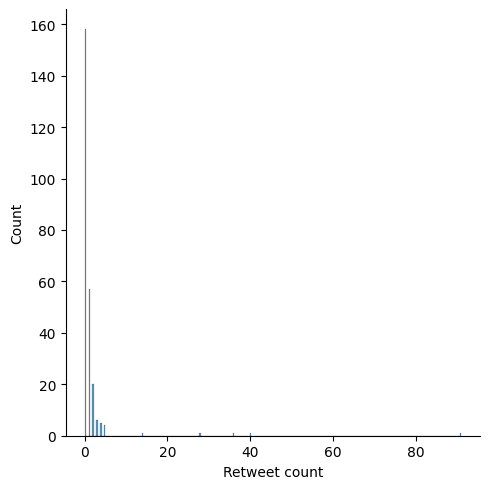

In [ ]:
sns.displot(dataframe, x="Retweet count")

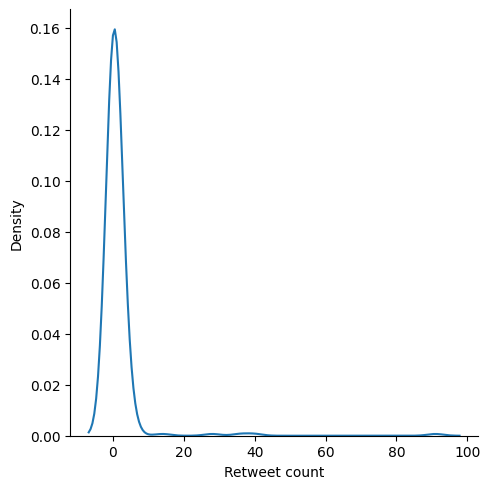

In [ ]:
sns.displot(dataframe, x="Retweet count",kind='kde')

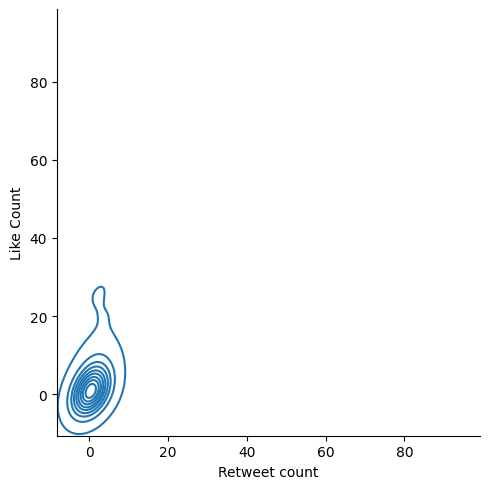

In [ ]:
sns.displot(data=dataframe, x="Retweet count", y="Like Count", kind="kde")

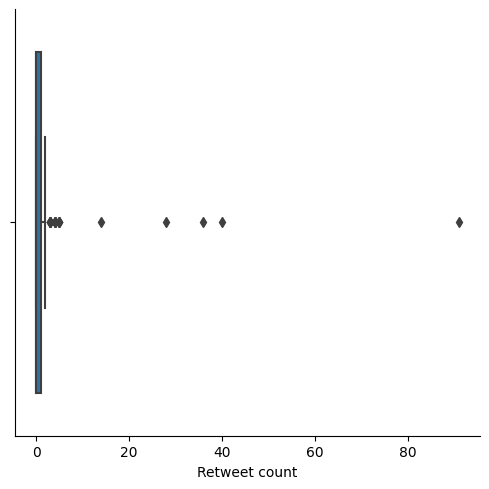

In [ ]:
sns.catplot(data=dataframe, x="Retweet count", kind="box")

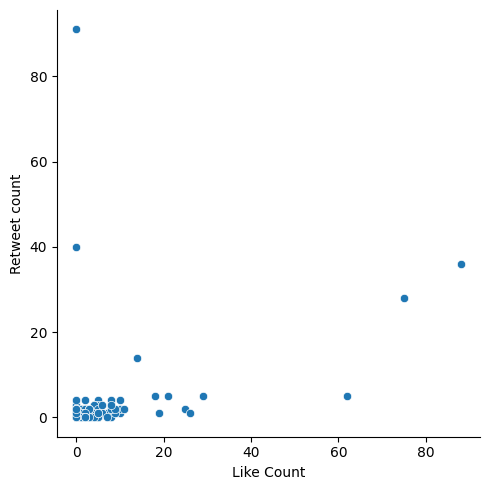

In [ ]:
sns.relplot(data=dataframe, x="Like Count", y="Retweet count")

# Conducting sentiment analysis on the tweet column

In [ ]:
print(dataframe['Tweet'][0])
print("Charm" in dataframe['Tweet'][0].lower())
s = pd.Series(dataframe['Tweet'][0].lower().split(" "),name='tweet0')
d = s.isin(["charm",'times','three'])

✨ Hear It Directly From Our Users!

Dive into real stories of how HiLink is transforming classrooms and enhancing t… https://t.co/qfakSwSNCS
False


In [ ]:
from textblob.en import subjectivity
def sentiment_analysis(tweet):
  blob = TextBlob(tweet)
  Sentiment = blob.sentiment
  polarity = Sentiment.polarity
  subjectivity = Sentiment.subjectivity
  return [polarity,subjectivity]

def get_analysis(tweet):
  polarity = sentiment_analysis(tweet)[0]
  if polarity < 0:
    return "Negative"
  elif polarity == 0:
    return 'Neutral'
  else:
    return "Positive"

def get_subjectivity(tweet):
  subjectivity = sentiment_analysis(tweet)[1]
  if subjectivity > 0.5:
    return "Very biased"
  if subjectivity == 0:
    return "Factual"
  if 0 < subjectivity <= 0.5:
    return "Slightly biased"

dataframe['Sentiment'] = dataframe['Tweet'].apply(lambda value: get_analysis(value))
dataframe['Subjectivity'] = dataframe['Tweet'].apply(lambda value: get_subjectivity(value))
dataframe

<ipython-input-27-2ae4b74baef3>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Sentiment'] = dataframe['Tweet'].apply(lambda value: get_analysis(value))
<ipython-input-27-2ae4b74baef3>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Subjectivity'] = dataframe['Tweet'].apply(lambda value: get_subjectivity(value))


,User,Tweet,Like Count,Retweet count,Tweet_processed,Education Affiliation,Normalized,Sentiment,Subjectivity
0,HiLink_Inc,✨ Hear It Directly From Our Users!\n\nDive int...,0,0.0,Hear It Directly From Our UsersDive into real ...,False,0.000000,Positive,Slightly biased
1,lacoe_ito,"If you missed last week's #LACOEAI Symposium,...",0,0.0,If you missed last LACOEAI Symposium here are ...,False,0.000000,Neutral,Slightly biased
2,IC_Sydney,Join us to celebrate #NationalScienceWeek with...,0,0.0,Join us to celebrate NationalScienceWeek with ...,False,0.000000,Neutral,Factual
3,leadlearnlab,💥 AI in Education: Friend or Foe?\n💡 Decoding ...,0,0.0,AI in Friend or Foe Decoding the Power of Resp...,True,0.000000,Positive,Very biased
4,bruff73,"🎓 Teachers, discover the potential of ChatGPT ...",0,0.0,Teachers discover the potential of ChatGPT as ...,False,0.000000,Neutral,Very biased
...,...,...,...,...,...,...,...,...,...
250,JasonATBASRPod,RT @TheHookRocks: 🪝Check out The Hook Rocks co...,0,1.0,Check out The Hook Rocks conversation with mus...,False,0.000805,Neutral,Factual
251,elevateyourride,RT @BeachStockTrade: $BLNK Blink Charging #Ear...,0,4.0,Blink Charging Earnings HC Wainwright Co reite...,False,0.003218,Neutral,Factual
252,SNova618,RT @Piz_Wiz: Guide to using Chat GPT to assist...,0,2.0,Guide to using Chat GPT to assist with game Ch...,False,0.001609,Negative,Slightly biased
253,CollinsLis74940,8196293️😑matter special above garden \n #同志直播软...,14,14.0,matter special above garden ChatGPT mm,False,0.011263,Positive,Slightly biased


In [ ]:
import numpy as np

postive_words = "absolutely,accepted,acclaimed,accomplish,accomplishment,achievement,awesome,empowerment,charm,lead,!,beautiful,celebrated,courageous,creative,wonderful".split(",")
def inPositive(value):
  pos = False
  for pos_word in postive_words:
    if pos_word in value:
      pos = True
      break
  if pos:
    return "Positive"
  else:
    return "Negative"
#dataframe

# Creating a pivot table on sentiment and retweets and graphing

In [ ]:
pivot = dataframe.pivot_table(index=['Sentiment'],values=['Retweet count'],aggfunc='sum')
print(pivot)

           Retweet count
Sentiment               
Negative            15.0
Neutral            125.0
Positive           224.0


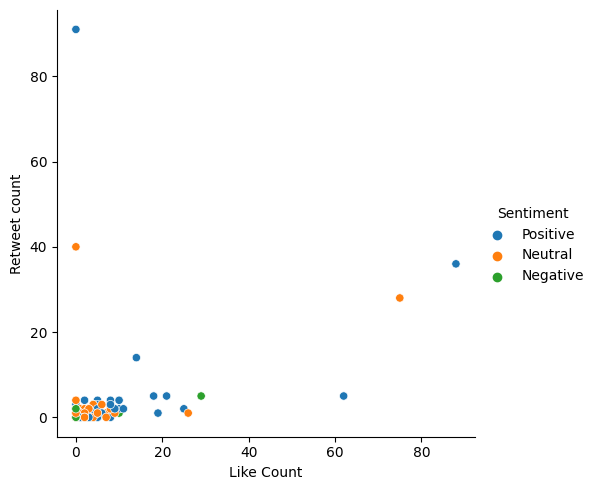

In [ ]:
sns.relplot(data=dataframe, x="Like Count", y="Retweet count", hue="Sentiment")

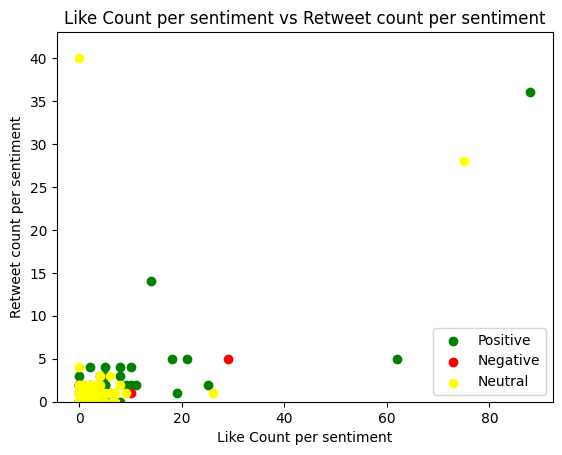

In [ ]:
import matplotlib.pyplot as plt
pos = dataframe.loc[dataframe['Sentiment']=='Positive']
neg = dataframe.loc[dataframe['Sentiment']=='Negative']
nue = dataframe.loc[dataframe['Sentiment']=='Neutral']

plt.scatter(data=pos, x="Like Count", y="Retweet count", color="green")
plt.scatter(data=neg, x="Like Count", y="Retweet count", color="red")
plt.scatter(data=nue, x="Like Count", y="Retweet count", color="yellow")

plt.title("Like Count per sentiment vs Retweet count per sentiment")
plt.xlabel("Like Count per sentiment")
plt.ylabel("Retweet count per sentiment")
plt.legend(['Positive','Negative','Neutral'])

plt.ylim(0,43)
plt.show()

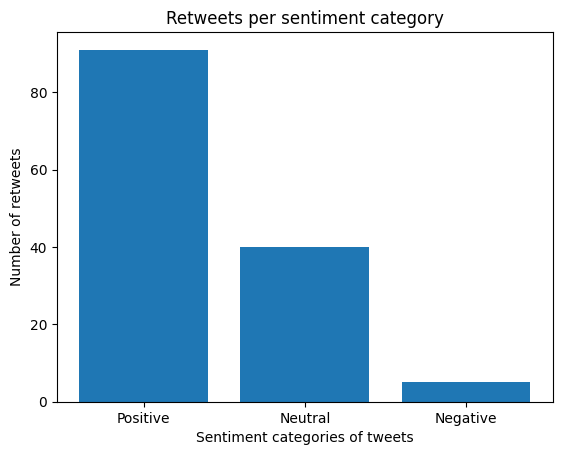

In [ ]:
plt.bar(list(dataframe['Sentiment']),list(dataframe['Retweet count']))
plt.xlabel("Sentiment categories of tweets")
plt.ylabel("Number of retweets")
plt.title("Retweets per sentiment category")
plt.show()

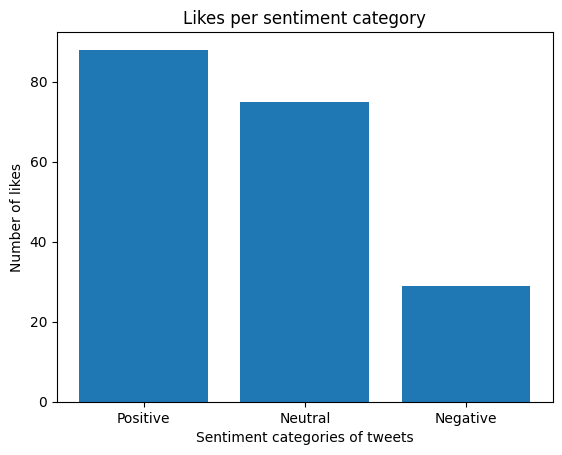

In [ ]:
plt.bar(list(dataframe['Sentiment']),list(dataframe['Like Count']))
plt.xlabel("Sentiment categories of tweets")
plt.ylabel("Number of likes")
plt.title("Likes per sentiment category")
plt.show()

# Graphing bias per sentiment

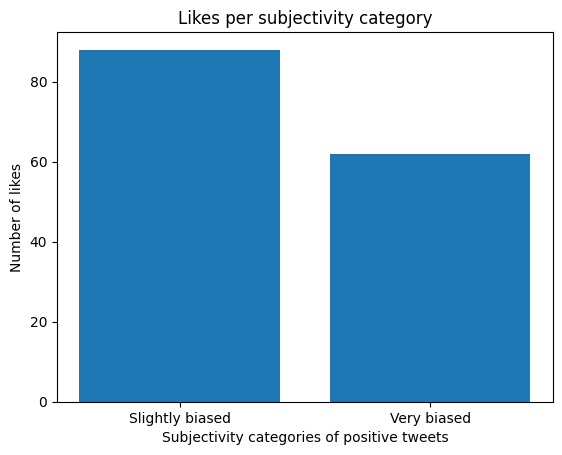

In [ ]:
plt.bar(list(pos['Subjectivity']),list(pos['Like Count']))
plt.xlabel("Subjectivity categories of positive tweets")
plt.ylabel("Number of likes")
plt.title("Likes per subjectivity category")
plt.show()

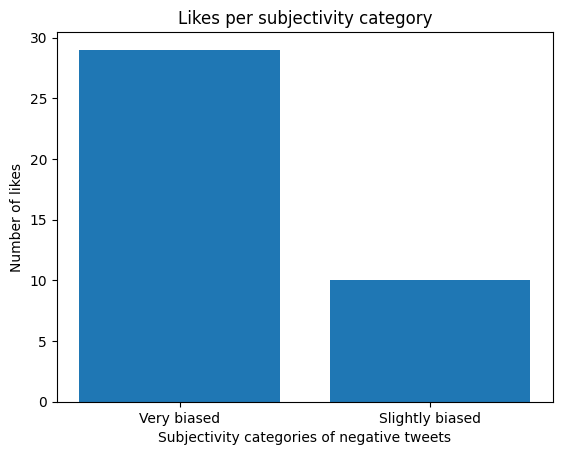

In [ ]:
plt.bar(list(neg['Subjectivity']),list(neg['Like Count']))
plt.xlabel("Subjectivity categories of negative tweets")
plt.ylabel("Number of likes")
plt.title("Likes per subjectivity category")
plt.show()

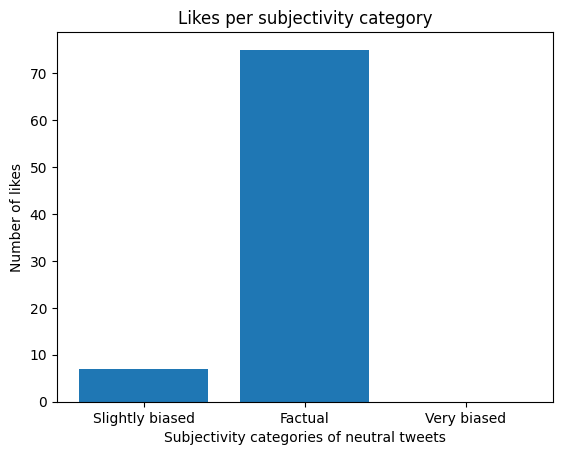

In [ ]:
plt.bar(list(nue['Subjectivity']),list(nue['Like Count']))
plt.xlabel("Subjectivity categories of neutral tweets")
plt.ylabel("Number of likes")
plt.title("Likes per subjectivity category")
plt.show()

# Visualizing Education Affilated Users

In [ ]:
only_edu_dataframe = dataframe.loc[dataframe['Education Affiliation']]
only_edu_dataframe.reset_index(drop=True,inplace=True)
only_edu_dataframe

,User,Tweet,Like Count,Retweet count,Tweet_processed,Education Affiliation,Normalized,Sentiment,Subjectivity
0,leadlearnlab,💥 AI in Education: Friend or Foe?\n💡 Decoding ...,0,0.0,AI in Friend or Foe Decoding the Power of Resp...,True,0.000000,Positive,Very biased
1,HarvardBizEdu,.@MitchWei of @HarvardHBS considers ChatGPT hi...,2,4.0,of considers ChatGPT his teaching our latest I...,True,0.003218,Positive,Very biased
2,teachermaticai,🚀 🎉 Kudos to Ayrshire College @AyrshireColl fo...,1,1.0,Kudos to Ayrshire College for diving into the ...,True,0.000805,Neutral,Factual
3,EduaideAi,"RT @leaningshane: School leaders, have you sta...",0,1.0,School leaders have you started creating polic...,True,0.000805,Neutral,Factual
4,EduLinkAI,The use of AI like #ChatGPT is stirring debate...,0,0.0,The use of AI like ChatGPT is stirring debate ...,True,0.000000,Neutral,Factual
5,teachkiwi,RT @ASCD: Discover the power of #AI chatbots i...,0,1.0,Discover the power of AI chatbots in the class...,True,0.000805,Positive,Slightly biased
6,HarvardBizEdu,Will #AI replace the educator? \n\nJoin profe...,0,0.0,Will AI replace the educator Join professors D...,True,0.000000,Positive,Slightly biased
7,leadlearnlab,💥 New Blog Post: AI in Education: Friend or Fo...,1,1.0,New Blog AI in Friend or Foe Decoding the Powe...,True,0.000805,Positive,Very biased
8,DailyAIEdu,Dive deep into the next-gen learning! Uncover ...,0,0.0,Dive deep into the learning Uncover how AI tec...,True,0.000000,Negative,Slightly biased
9,EduaideAi,RT @leaningshane: The big questions: Does #AI ...,0,1.0,The big Does AI make teachers obsolete How to ...,True,0.000805,Positive,Slightly biased


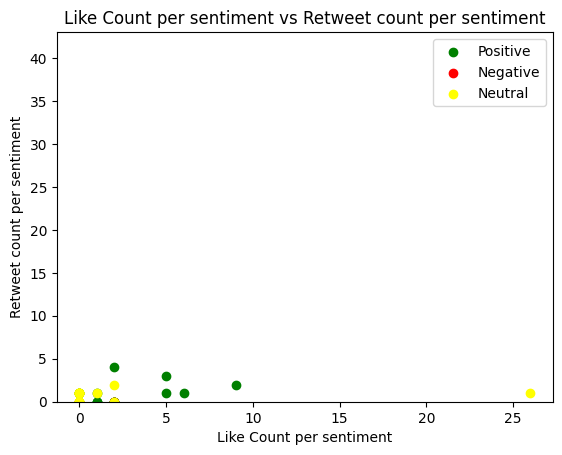

In [ ]:
pos = only_edu_dataframe.loc[only_edu_dataframe['Sentiment']=='Positive']
neg = only_edu_dataframe.loc[only_edu_dataframe['Sentiment']=='Negative']
nue = only_edu_dataframe.loc[only_edu_dataframe['Sentiment']=='Neutral']

plt.scatter(data=pos, x="Like Count", y="Retweet count", color="green")
plt.scatter(data=neg, x="Like Count", y="Retweet count", color="red")
plt.scatter(data=nue, x="Like Count", y="Retweet count", color="yellow")

plt.title("Like Count per sentiment vs Retweet count per sentiment")
plt.xlabel("Like Count per sentiment")
plt.ylabel("Retweet count per sentiment")
plt.legend(['Positive','Negative','Neutral'])

plt.ylim(0,43)
plt.show()

# Visualizing non-education affiliated users

In [ ]:
not_edu_dataframe = dataframe.loc[~dataframe['Education Affiliation']]
not_edu_dataframe.reset_index(drop=True,inplace=True)
not_edu_dataframe

,User,Tweet,Like Count,Retweet count,Tweet_processed,Education Affiliation,Normalized,Sentiment,Subjectivity
0,HiLink_Inc,✨ Hear It Directly From Our Users!\n\nDive int...,0,0.0,Hear It Directly From Our UsersDive into real ...,False,0.000000,Positive,Slightly biased
1,lacoe_ito,"If you missed last week's #LACOEAI Symposium,...",0,0.0,If you missed last LACOEAI Symposium here are ...,False,0.000000,Neutral,Slightly biased
2,IC_Sydney,Join us to celebrate #NationalScienceWeek with...,0,0.0,Join us to celebrate NationalScienceWeek with ...,False,0.000000,Neutral,Factual
3,bruff73,"🎓 Teachers, discover the potential of ChatGPT ...",0,0.0,Teachers discover the potential of ChatGPT as ...,False,0.000000,Neutral,Very biased
4,alaba_ai,Behind #ai there is a lot of work done and muc...,0,0.0,Behind ai there is a lot of work done and much...,False,0.000000,Positive,Very biased
...,...,...,...,...,...,...,...,...,...
208,JasonATBASRPod,RT @TheHookRocks: 🪝Check out The Hook Rocks co...,0,1.0,Check out The Hook Rocks conversation with mus...,False,0.000805,Neutral,Factual
209,elevateyourride,RT @BeachStockTrade: $BLNK Blink Charging #Ear...,0,4.0,Blink Charging Earnings HC Wainwright Co reite...,False,0.003218,Neutral,Factual
210,SNova618,RT @Piz_Wiz: Guide to using Chat GPT to assist...,0,2.0,Guide to using Chat GPT to assist with game Ch...,False,0.001609,Negative,Slightly biased
211,CollinsLis74940,8196293️😑matter special above garden \n #同志直播软...,14,14.0,matter special above garden ChatGPT mm,False,0.011263,Positive,Slightly biased


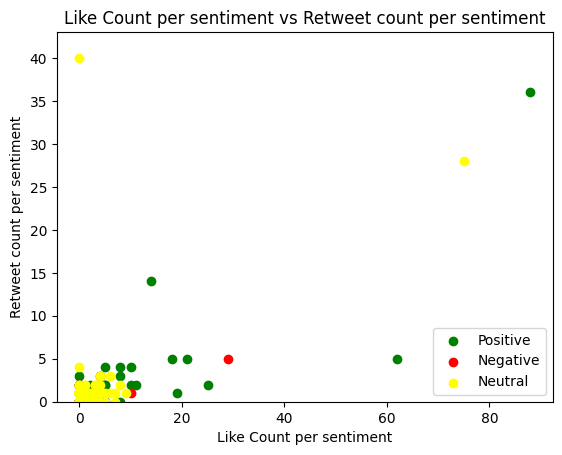

In [ ]:
pos = not_edu_dataframe.loc[not_edu_dataframe['Sentiment']=='Positive']
neg = not_edu_dataframe.loc[not_edu_dataframe['Sentiment']=='Negative']
nue = not_edu_dataframe.loc[not_edu_dataframe['Sentiment']=='Neutral']

plt.scatter(data=pos, x="Like Count", y="Retweet count", color="green")
plt.scatter(data=neg, x="Like Count", y="Retweet count", color="red")
plt.scatter(data=nue, x="Like Count", y="Retweet count", color="yellow")

plt.title("Like Count per sentiment vs Retweet count per sentiment")
plt.xlabel("Like Count per sentiment")
plt.ylabel("Retweet count per sentiment")
plt.legend(['Positive','Negative','Neutral'])

plt.ylim(0,43)
plt.show()

# Download the table to CSV file

In [ ]:
from google.colab import files # to download file we need this library
dataframe.to_csv("data.csv", sep=',', encoding='utf-8')
files.download('data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Post-Downloading Dataset - Inductive Coding
I am double-checking the sentiment/subjectivity analysis as well as adding columns for opinions expressed.

Opinions:
*   responsible use
*   transforming education
*   personalized learning
* future of knowledge
* empowering educators
* cheating
* limitless possibilities
* supporting students
* integration
* threatening human labor
* exercise caution
* no impact to curriculum
* banning AI




In [ ]:
dataframe = pd.read_csv('./new_onlyedu_dataset.csv')
dataframe

,Unnamed: 0,User,Tweet,Like Count,Retweet count,Education Affiliation,Sentiment,Subjectivity,Opinion Expressed
0,0,MrsWall08620646,"After a lovely chat with @OBWax in June, I am ...",4,0,False,Positive,Very biased,False
1,1,13esu,RT @ESUCC: Interested in learning more about #...,0,2,False,Positive,Slightly biased,False
2,2,ellen_nayeli,Exciting News from AcademicHelp🚀\nWe are pumpe...,0,0,False,Positive,Very biased,False
3,3,lacoe_ito,"@MJMadda @Google @Choangy1 Thank you, Dr. Madd...",0,0,False,Positive,Very biased,False
4,4,HeidiSiwak,Check out my latest article: Helping Children ...,1,0,False,Positive,Very biased,True
...,...,...,...,...,...,...,...,...,...
253,254,Amitjainisme,RT @_0xKenny: $DNX $0.18 -&gt; $0.40 \n\nALL I...,0,6,False,Neutral,Factual,False
254,255,lawdroid,How GCs Can Use #GenerativeAI To Speak The Lan...,0,0,False,Positive,Slightly biased,False
255,256,dinisguarda,RT @Khulood_Almani: 🏆🌎What are the World's🔝100...,0,82,False,Neutral,Factual,False
256,257,dinisguarda,RT @c4trends: Top 100 Global Brands in 2023 v/...,0,5,False,Positive,Slightly biased,False


In [ ]:
# filtering out rows with no opinion expressed
dataframe = dataframe[dataframe['Opinion Expressed']==True]
dataframe.reset_index(drop=True,inplace=True)
dataframe

,Unnamed: 0,User,Tweet,Like Count,Retweet count,Education Affiliation,Sentiment,Subjectivity,Opinion Expressed
0,4,HeidiSiwak,Check out my latest article: Helping Children ...,1,0,False,Positive,Very biased,True
1,5,therealjpittman,Harvard researchers are exploring new ways to ...,0,0,False,Positive,Slightly biased,True
2,7,HMustaqbil,Let's continue exploring the limitless possibi...,0,0,False,Positive,Slightly biased,True
3,8,EduaideAi,RT @leaningshane: Imagine a future where AI su...,0,1,True,Positive,Very biased,True
4,9,bruff73,🤝 Join our session on ethical AI use in educat...,0,0,False,Positive,Slightly biased,True
...,...,...,...,...,...,...,...,...,...
144,226,GlobalEdAction,Unlock the potential of #AI in your classroom!...,4,2,False,Neutral,Very biased,True
145,232,MeenakshiMalha2,RT @Reflectivediary: In the weekly #SundayDiar...,0,1,False,Neutral,Factual,True
146,233,devficsolutions,🤖📚 Unleash the power of AI in education! Perso...,0,0,False,Neutral,Slightly biased,True
147,236,momblogger,"In the years to come, we can expect to see eve...",5,0,False,Positive,Very biased,True


In [ ]:
dataframe.to_csv("data.csv", sep=',', encoding='utf-8')
files.download('data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
dataframe = pd.read_csv('./opinion_expressed.csv')
dataframe

,Unnamed: 0,User,Tweet,Like Count,Retweet count,Education Affiliation,Sentiment,Subjectivity,Opinion
0,0,HeidiSiwak,Check out my latest article: Helping Children ...,1,0,False,Positive,Very biased,responsible use
1,1,therealjpittman,Harvard researchers are exploring new ways to ...,0,0,False,Positive,Slightly biased,transforming education
2,2,HMustaqbil,Let's continue exploring the limitless possibi...,0,0,False,Positive,Slightly biased,limitless possibilities
3,3,EduaideAi,RT @leaningshane: Imagine a future where AI su...,0,1,True,Positive,Very biased,personalized learning
4,4,bruff73,🤝 Join our session on ethical AI use in educat...,0,0,False,Positive,Slightly biased,responsible use
...,...,...,...,...,...,...,...,...,...
138,144,GlobalEdAction,Unlock the potential of #AI in your classroom!...,4,2,False,Positive,Very biased,empowering educators
139,145,MeenakshiMalha2,RT @Reflectivediary: In the weekly #SundayDiar...,0,1,False,Positive,Very biased,transforming education
140,146,devficsolutions,🤖📚 Unleash the power of AI in education! Perso...,0,0,False,Positive,Slightly biased,personalized learning
141,147,momblogger,"In the years to come, we can expect to see eve...",5,0,False,Positive,Very biased,integration


In [ ]:
del dataframe['Unnamed: 0']
dataframe

,User,Tweet,Like Count,Retweet count,Education Affiliation,Sentiment,Subjectivity,Opinion
0,HeidiSiwak,Check out my latest article: Helping Children ...,1,0,False,Positive,Very biased,responsible use
1,therealjpittman,Harvard researchers are exploring new ways to ...,0,0,False,Positive,Slightly biased,transforming education
2,HMustaqbil,Let's continue exploring the limitless possibi...,0,0,False,Positive,Slightly biased,limitless possibilities
3,EduaideAi,RT @leaningshane: Imagine a future where AI su...,0,1,True,Positive,Very biased,personalized learning
4,bruff73,🤝 Join our session on ethical AI use in educat...,0,0,False,Positive,Slightly biased,responsible use
...,...,...,...,...,...,...,...,...
138,GlobalEdAction,Unlock the potential of #AI in your classroom!...,4,2,False,Positive,Very biased,empowering educators
139,MeenakshiMalha2,RT @Reflectivediary: In the weekly #SundayDiar...,0,1,False,Positive,Very biased,transforming education
140,devficsolutions,🤖📚 Unleash the power of AI in education! Perso...,0,0,False,Positive,Slightly biased,personalized learning
141,momblogger,"In the years to come, we can expect to see eve...",5,0,False,Positive,Very biased,integration


# Creating a pie chart with opinions expressed
I'm choosing to include retweets to better represent the quantity of opinions

In [ ]:
def get_pie_chart(dataframe):
  counts = dataframe['Opinion'].value_counts()

  labels = counts.index.tolist()
  values = counts.values.tolist()

  plt.figure(figsize = (5,5))
  ax = plt.pie(values, labels=labels, autopct='%1.2f%%', shadow=True)

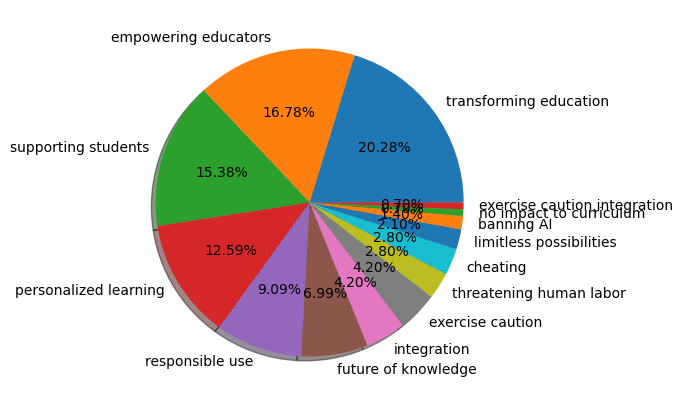

In [ ]:
get_pie_chart(dataframe)

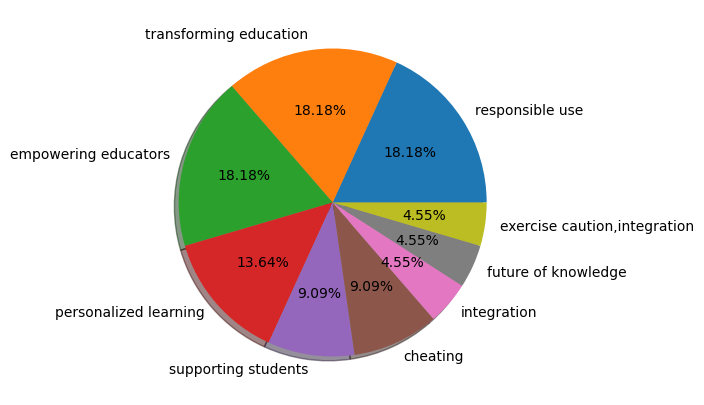

In [ ]:
# analyzing for education users
only_edu_dataframe = dataframe.loc[dataframe['Education Affiliation']]
only_edu_dataframe.reset_index(drop=True,inplace=True)

get_pie_chart(only_edu_dataframe)

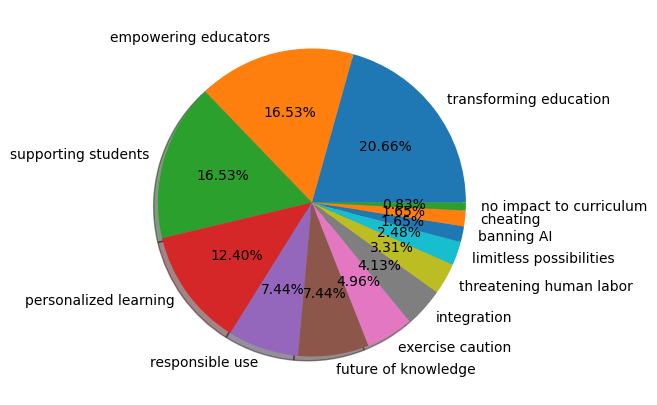

In [ ]:
# analyzing for non education users
not_edu_dataframe = dataframe.loc[dataframe['Education Affiliation']==False]
not_edu_dataframe.reset_index(drop=True,inplace=True)

get_pie_chart(not_edu_dataframe)

# Creating a wordcloud with opinions expressed

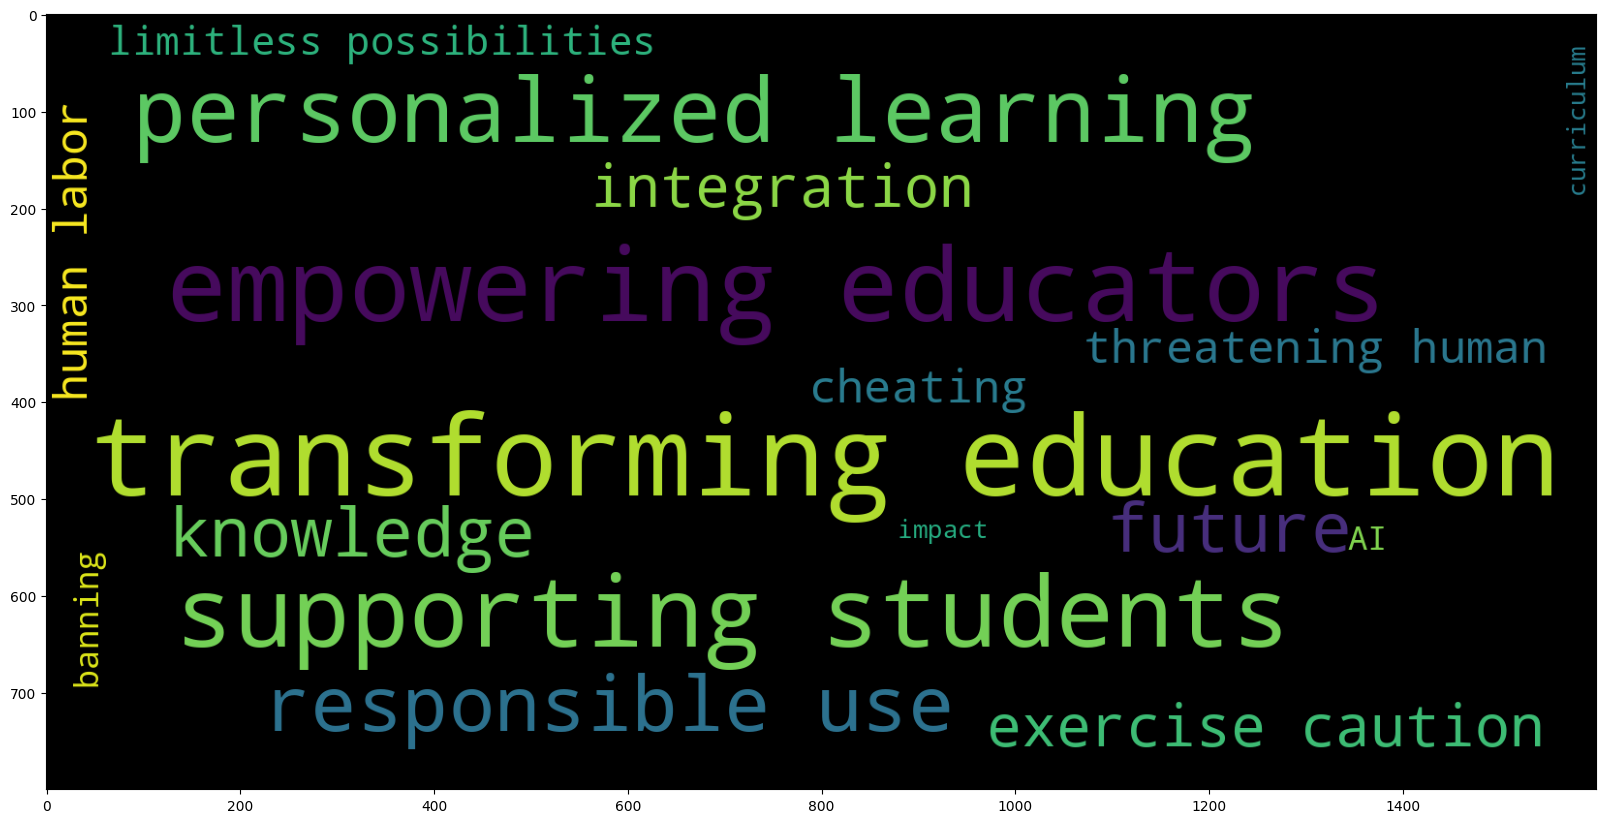

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20))
text = " ".join(dataframe['Opinion'])
wc = WordCloud(width = 1600,height = 800).generate(text)
plt.imshow(wc)

# Regraphing bias vs likes and retweets
* for entire dataset
* for non-edu and edu users

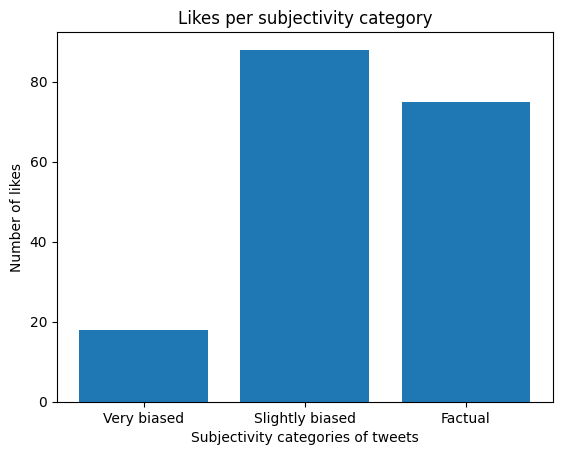

In [ ]:
# entire dataset
plt.bar(list(dataframe['Subjectivity']),list(dataframe['Like Count']))
plt.xlabel("Subjectivity categories of tweets")
plt.ylabel("Number of likes")
plt.title("Likes per subjectivity category")
plt.show()

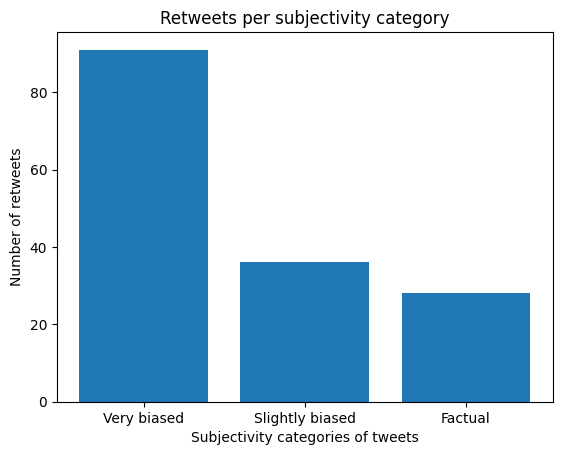

In [ ]:
# entire dataset
plt.bar(list(dataframe['Subjectivity']),list(dataframe['Retweet count']))
plt.xlabel("Subjectivity categories of tweets")
plt.ylabel("Number of retweets")
plt.title("Retweets per subjectivity category")
plt.show()

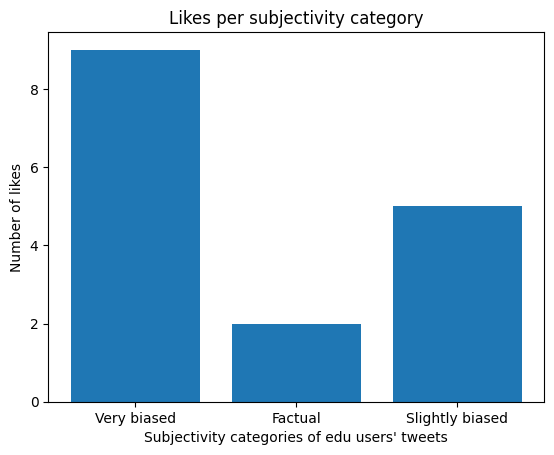

In [ ]:
# only edu
plt.bar(list(only_edu_dataframe['Subjectivity']),list(only_edu_dataframe['Like Count']))
plt.xlabel("Subjectivity categories of edu users' tweets")
plt.ylabel("Number of likes")
plt.title("Likes per subjectivity category")
plt.show()

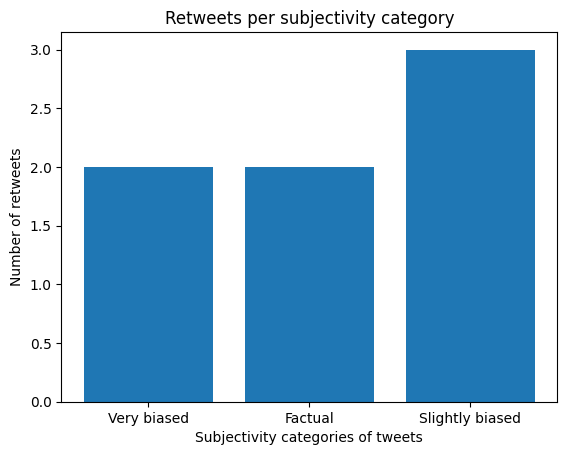

In [ ]:
# only edu
plt.bar(list(only_edu_dataframe['Subjectivity']),list(only_edu_dataframe['Retweet count']))
plt.xlabel("Subjectivity categories of tweets")
plt.ylabel("Number of retweets")
plt.title("Retweets per subjectivity category")
plt.show()

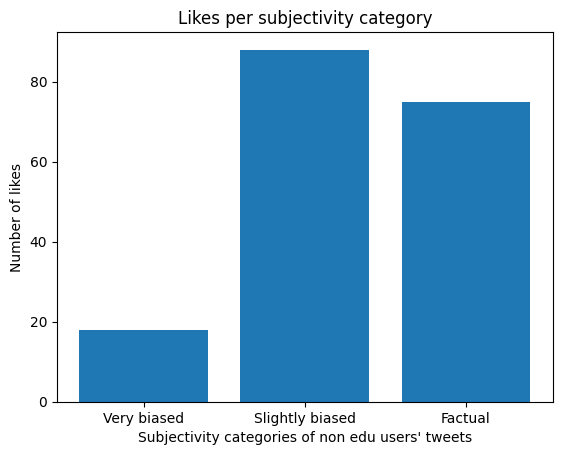

In [ ]:
# non edu
plt.bar(list(not_edu_dataframe['Subjectivity']),list(not_edu_dataframe['Like Count']))
plt.xlabel("Subjectivity categories of non edu users' tweets")
plt.ylabel("Number of likes")
plt.title("Likes per subjectivity category")

plt.show()

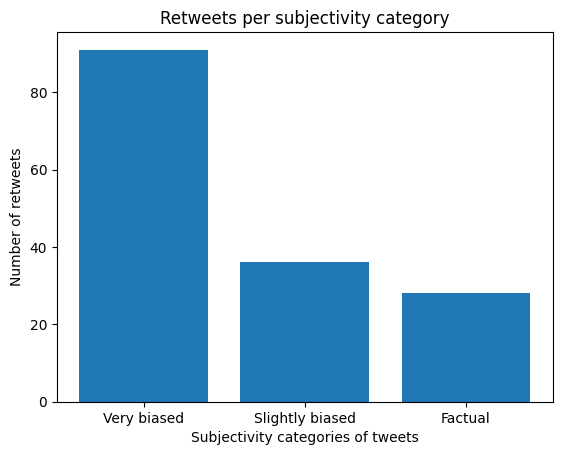

In [ ]:
# non edu
plt.bar(list(not_edu_dataframe['Subjectivity']),list(not_edu_dataframe['Retweet count']))
plt.xlabel("Subjectivity categories of tweets")
plt.ylabel("Number of retweets")
plt.title("Retweets per subjectivity category")
plt.show()

# Regraphing sentiment analysis

In [ ]:
pivot = dataframe.pivot_table(index=['Sentiment'],values=['Retweet count'],aggfunc='sum')
print(pivot)

           Retweet count
Sentiment               
Negative               2
Neutral               43
Positive             168


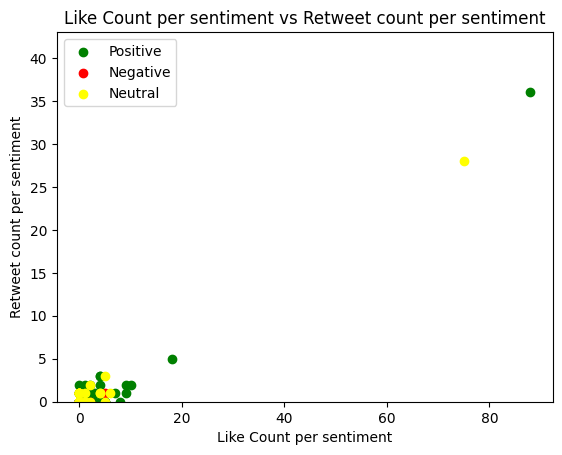

In [ ]:
pos = dataframe.loc[dataframe['Sentiment']=='Positive']
neg = dataframe.loc[dataframe['Sentiment']=='Negative']
nue = dataframe.loc[dataframe['Sentiment']=='Neutral']

plt.scatter(data=pos, x="Like Count", y="Retweet count", color="green")
plt.scatter(data=neg, x="Like Count", y="Retweet count", color="red")
plt.scatter(data=nue, x="Like Count", y="Retweet count", color="yellow")

plt.title("Like Count per sentiment vs Retweet count per sentiment")
plt.xlabel("Like Count per sentiment")
plt.ylabel("Retweet count per sentiment")
plt.legend(['Positive','Negative','Neutral'])

plt.ylim(0,43)
plt.show()

# Graphing a bar graph of sentiment and bias quanities

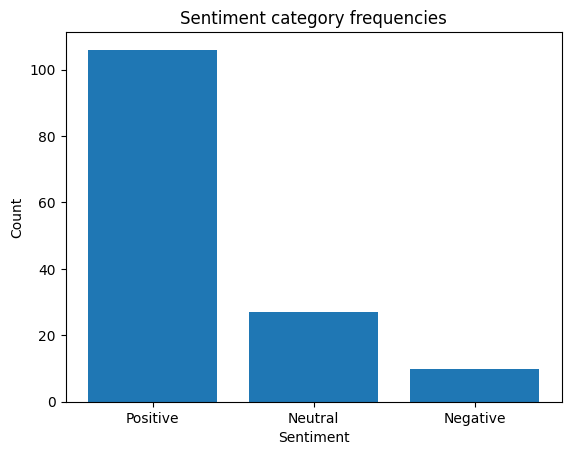

In [ ]:
counts = dataframe['Sentiment'].value_counts()
labels = counts.index.tolist()
values = counts.values.tolist()

plt.bar(labels,values)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment category frequencies")
plt.show()

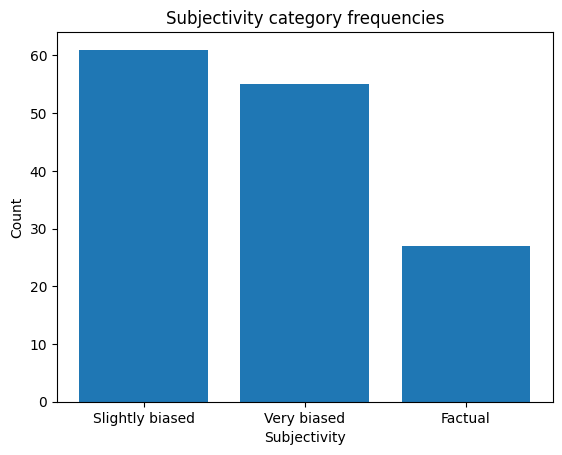

In [ ]:
counts = dataframe['Subjectivity'].value_counts()
labels = counts.index.tolist()
values = counts.values.tolist()

plt.bar(labels,values)
plt.xlabel("Subjectivity")
plt.ylabel("Count")
plt.title("Subjectivity category frequencies")
plt.show()